In [5]:
from numpy import percentile
def remove_outliers(data,threshold):
    data_rows = [0 for ix, row in data.iterrows()]
    data_features = data.copy()
    target = data_features.pop('DEATH_EVENT')
    outliers_num = 0
    rows_to_drop=set()
    for var in data_features:
        val_max = data_features[var].max()
        val_min = data_features[var].min()
    #     print(val_max)
    #     print(val_min)
        quartiles = percentile(data_features[var], [25, 50, 75])
    #     print (quartiles)

        iqr = quartiles[2] - quartiles[0]

        lower_val_aceptable = quartiles[0] - 1.5*iqr
        max_val_aceptable = quartiles[2] + 1.5*iqr

    #     print (lower_val_aceptable)
    #     print (max_val_aceptable)


        if val_max > max_val_aceptable or val_min < lower_val_aceptable:
            count=0
            for ele in data_features[var]:
                if ele > max_val_aceptable or ele < lower_val_aceptable:
                    data_rows[count]+=1
                    if data_rows[count] > threshold:
                        outliers_num+=1
                        rows_to_drop.add(count)
                count+=1
                
    print("Threshold for outliers = ", threshold)
    print("Outliers number = ",outliers_num)
    clean_data = data_features.drop(rows_to_drop, axis=0)
    clean_targets = target.drop(rows_to_drop, axis=0)
    print(len(clean_data), " || ", len(clean_targets))
    return clean_data, clean_targets

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data)
df_nr = pd.DataFrame(transf.transform(data), columns= data.columns)
norm_data_zscore = df_nr
norm_data_zscore.describe(include='all')

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_minmax = df_nr
norm_data_minmax.describe(include='all')

Xz: np.ndarray = norm_data_zscore.values
XmM : np.ndarray = norm_data_minmax.values

Threshold for outliers =  0
Outliers number =  85
224  ||  224


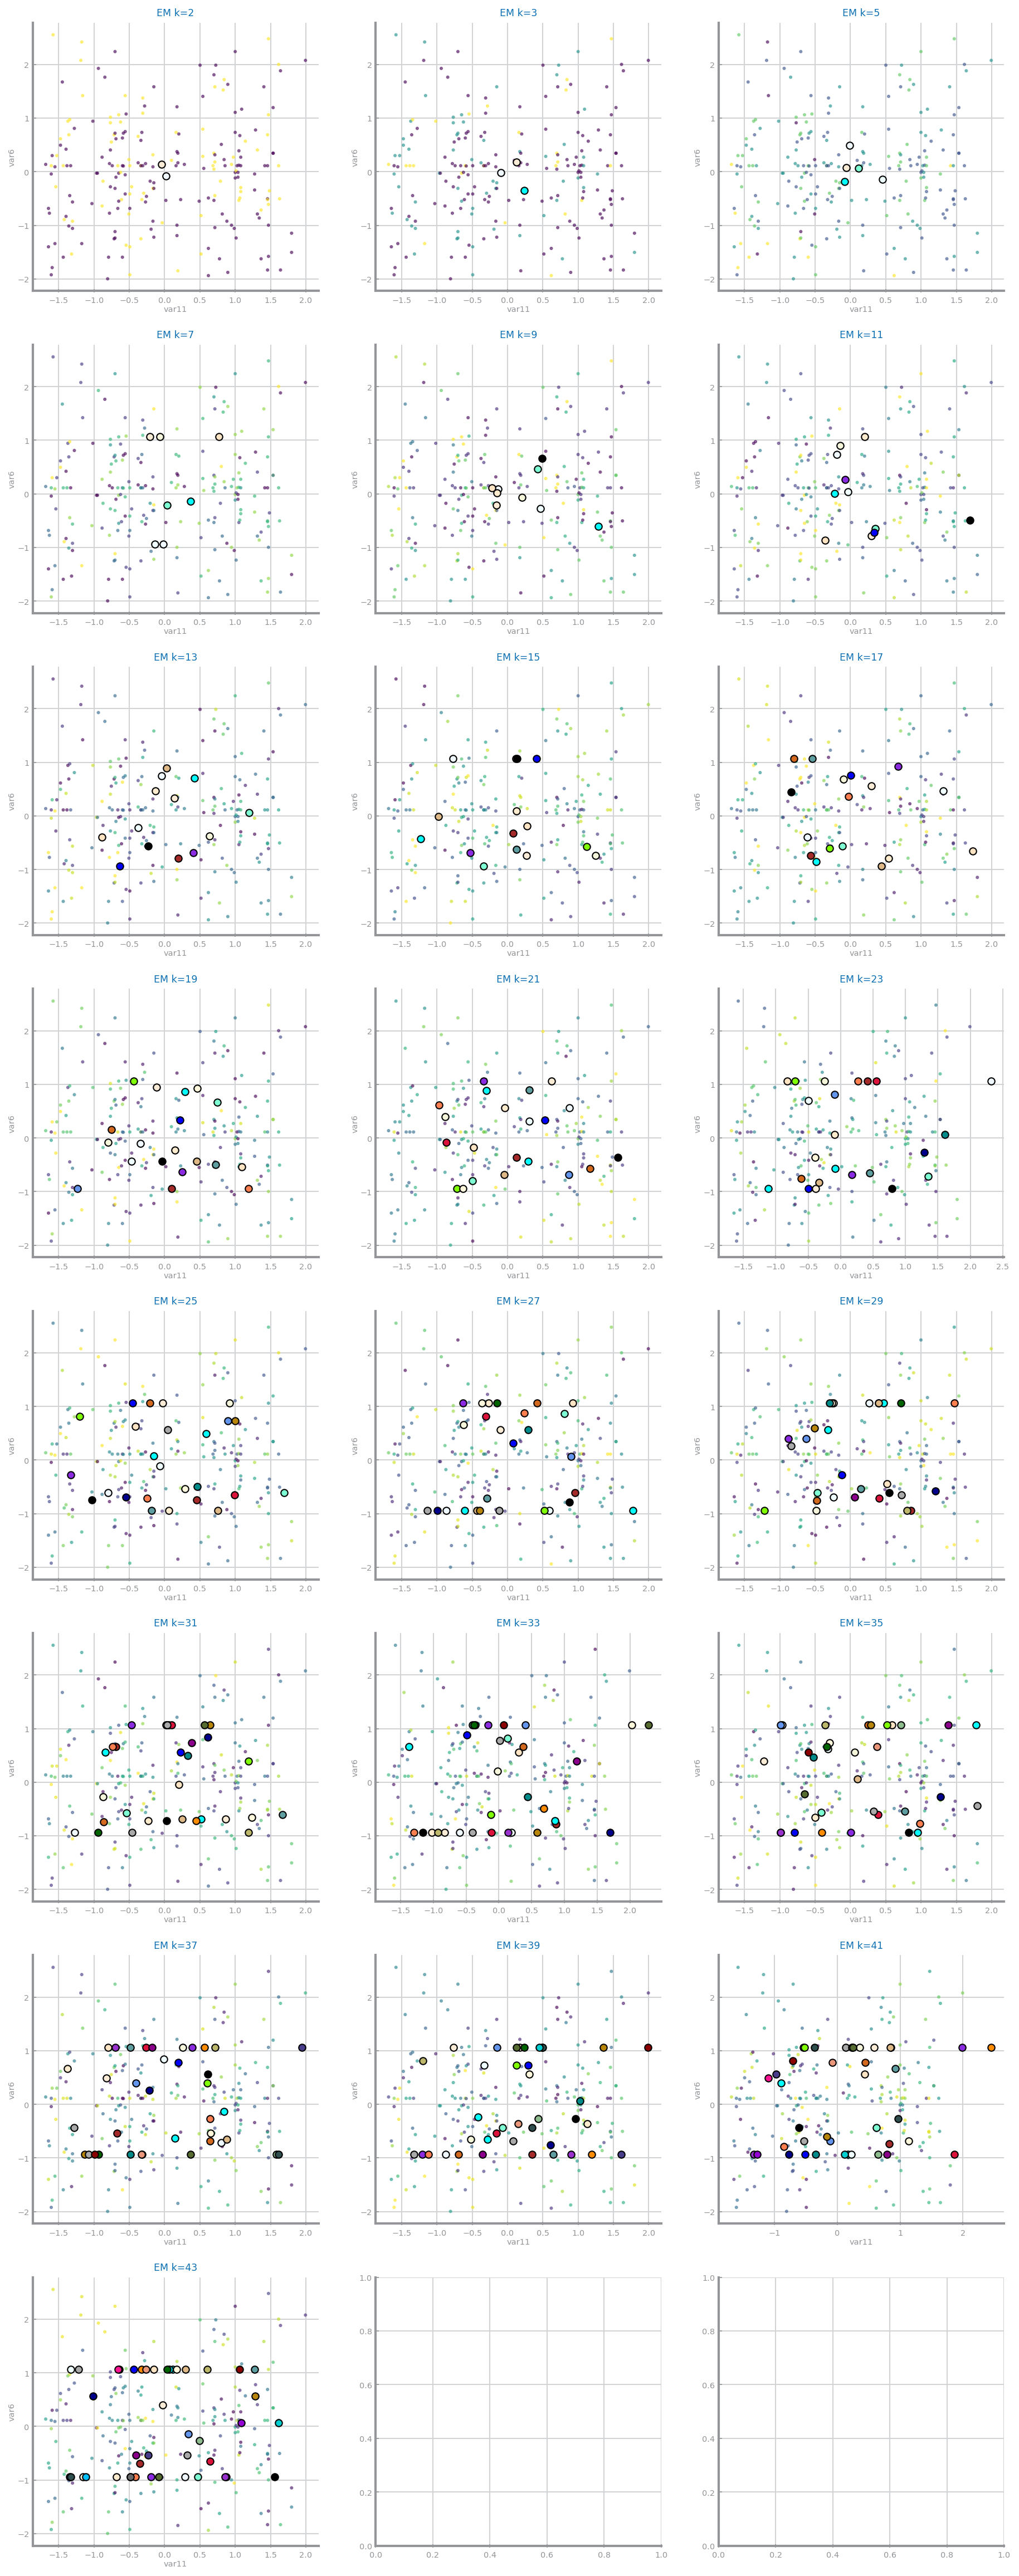

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.metrics import silhouette_score

data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
v1 = 6
v2 = 11

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31,33, 35, 37, 39, 41, 43]
rows, cols = ds.choose_grid(len(N_CLUSTERS))
data0, y0 = remove_outliers(data, 0)
transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data0)
df_nr = pd.DataFrame(transf.transform(data0), columns= data0.columns)
norm_data_zscore = df_nr
norm_data_zscore.describe(include='all')

from sklearn.mixture import GaussianMixture

mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(norm_data_zscore)
    labels = estimator.predict(norm_data_zscore)
    mse.append(ds.compute_mse(norm_data_zscore.values, labels, estimator.means_))
    sc.append(silhouette_score(norm_data_zscore, labels))
    ds.plot_clusters(norm_data_zscore, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

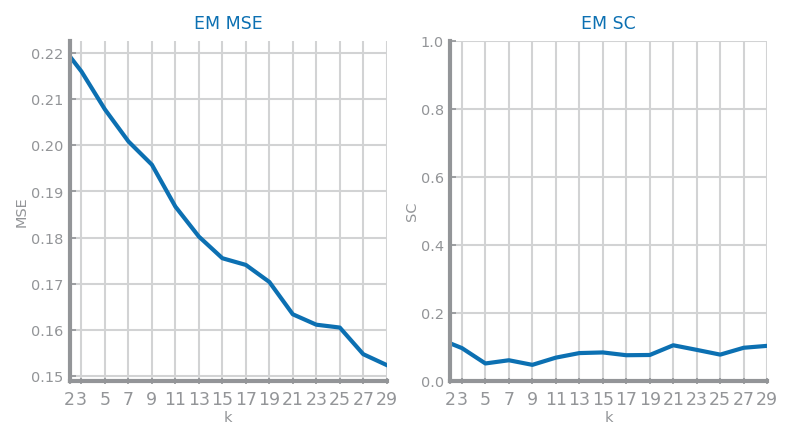

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
plt.show()

Threshold for outliers =  0
Outliers number =  85
224  ||  224


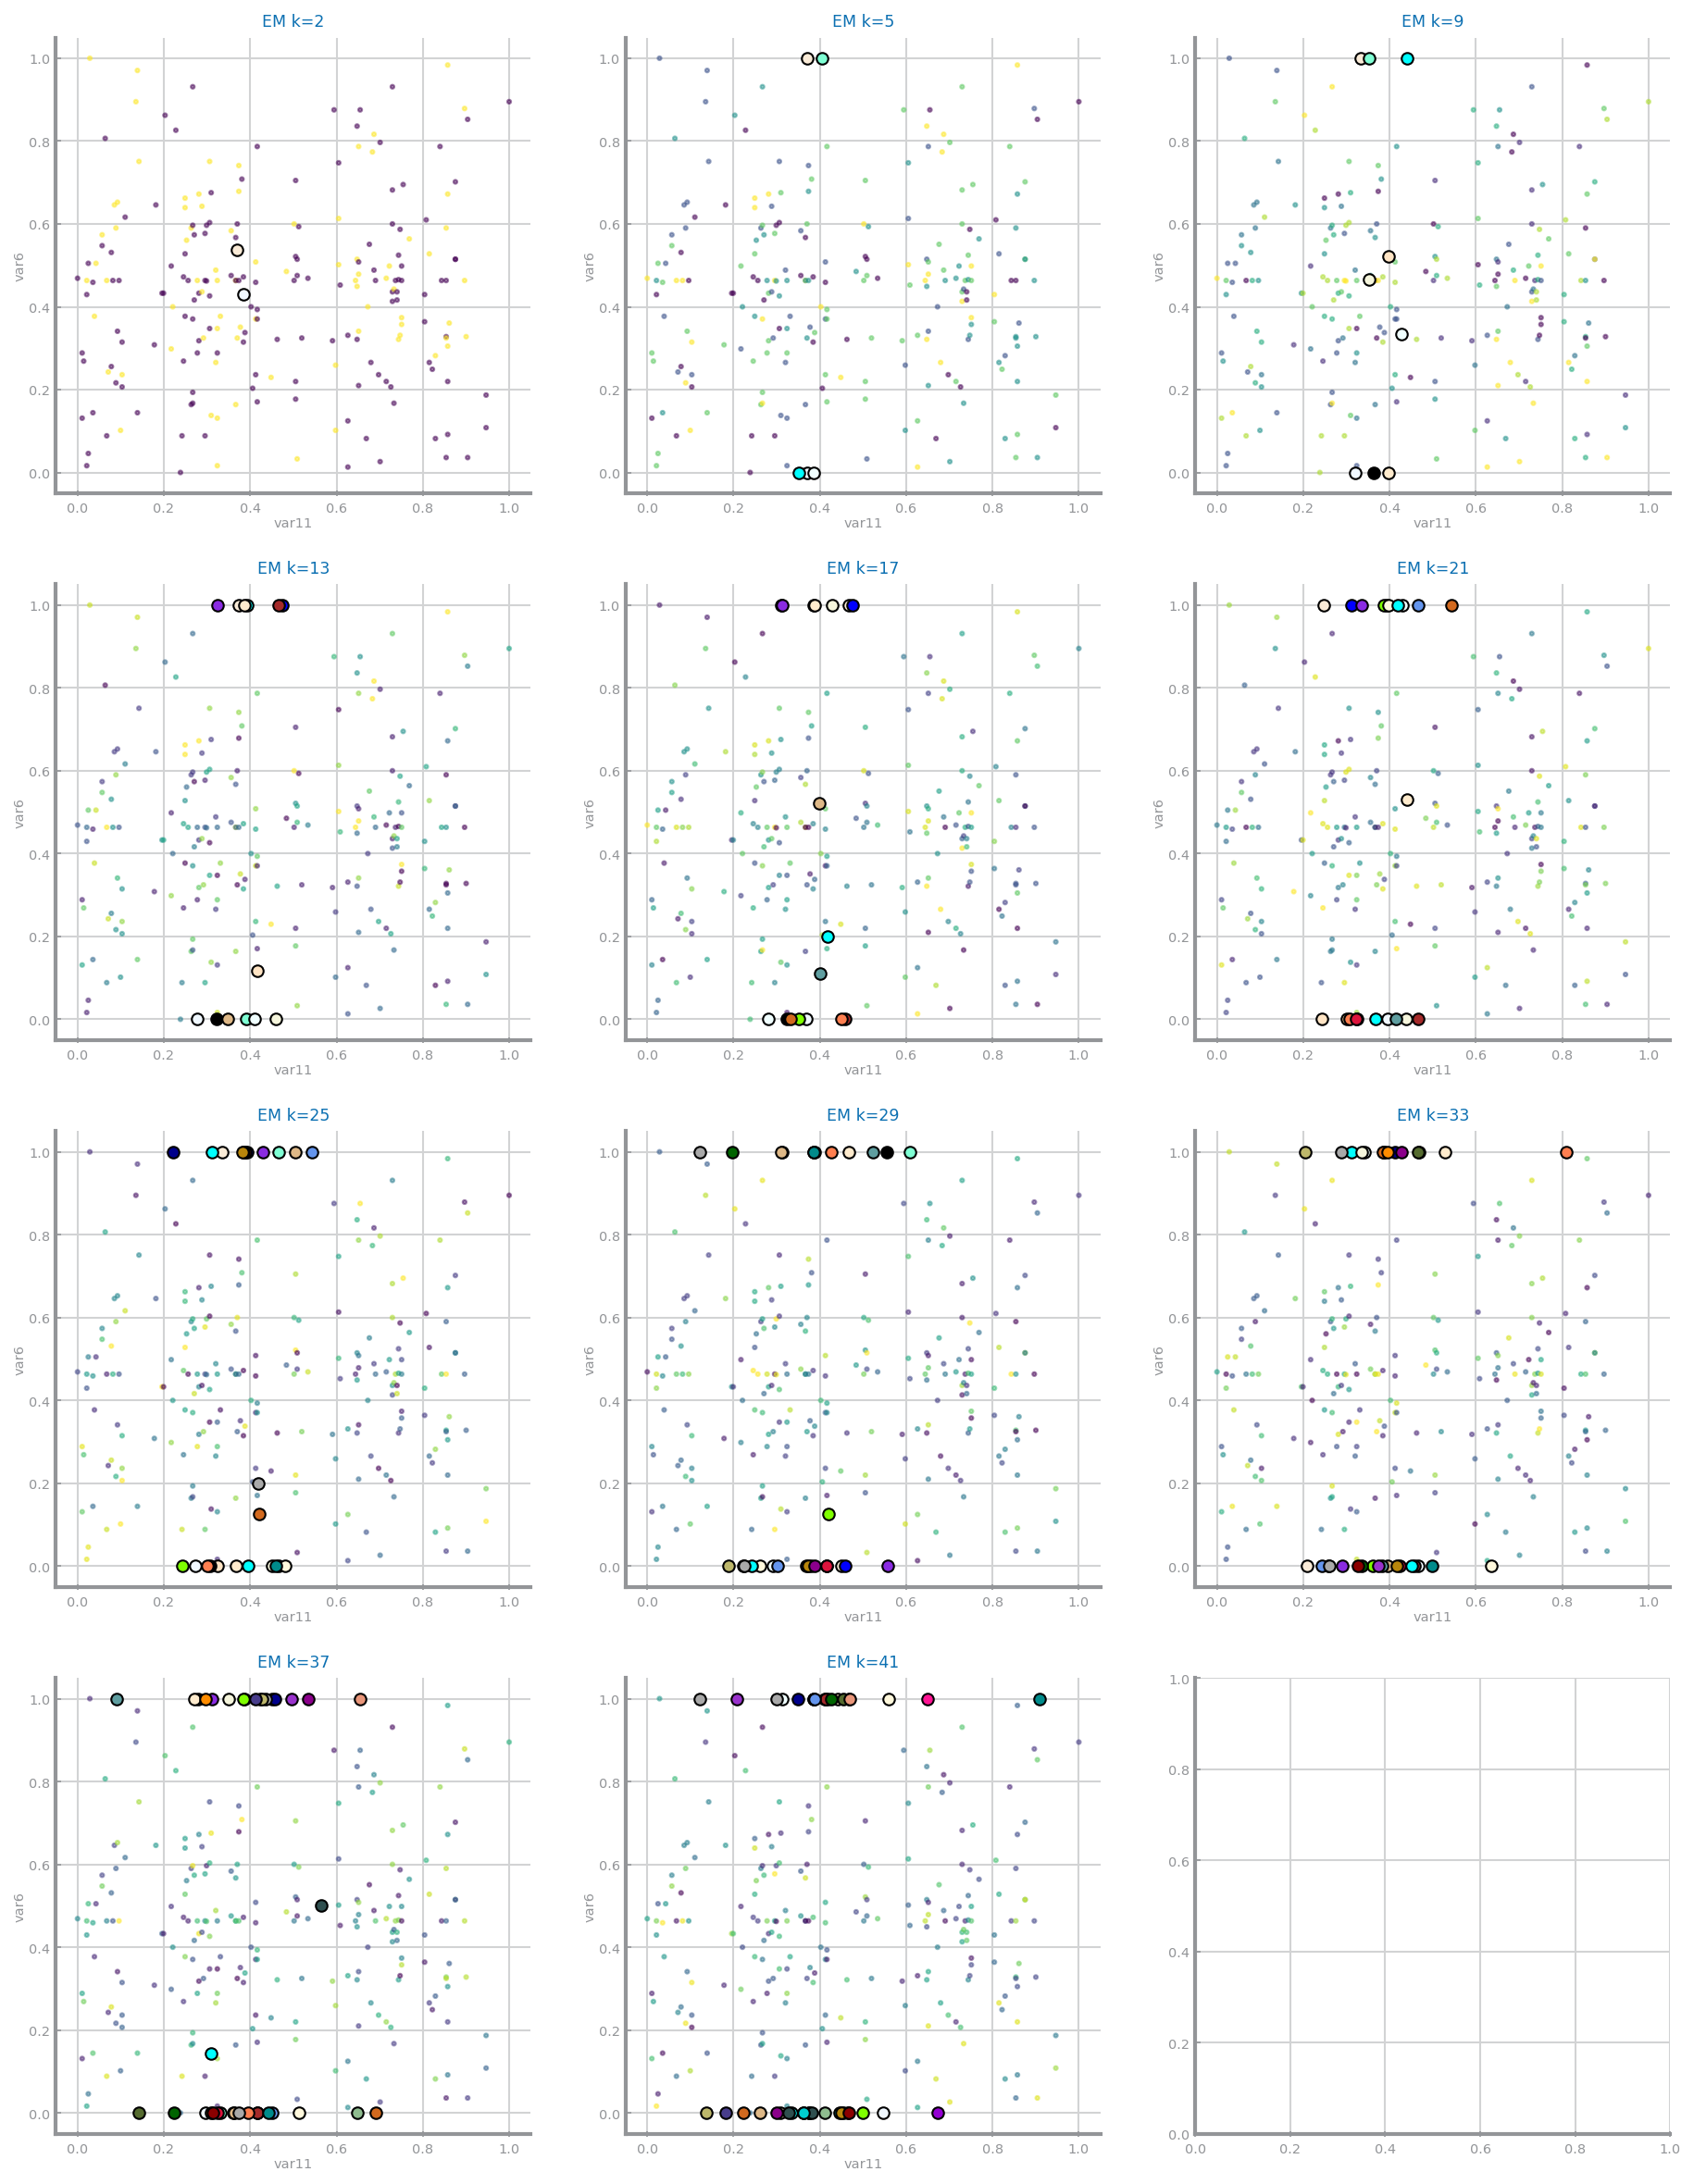

In [96]:
data: pd.DataFrame = pd.read_csv('datasets/heart_failure_clinical_records_dataset.csv')
v1 = 6
v2 = 11

N_CLUSTERS = [2, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41]
rows, cols = ds.choose_grid(len(N_CLUSTERS))
data0, y0 = remove_outliers(data, 0)
transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_minmax = df_nr
norm_data_minmax.describe(include='all')

from sklearn.mixture import GaussianMixture

mse: list = []
sc: list = []
_, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    estimator = GaussianMixture(n_components=k)
    estimator.fit(norm_data_minmax)
    labels = estimator.predict(norm_data_minmax)
    mse.append(ds.compute_mse(norm_data_minmax.values, labels, estimator.means_))
    sc.append(silhouette_score(norm_data_minmax, labels))
    ds.plot_clusters(norm_data_minmax, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

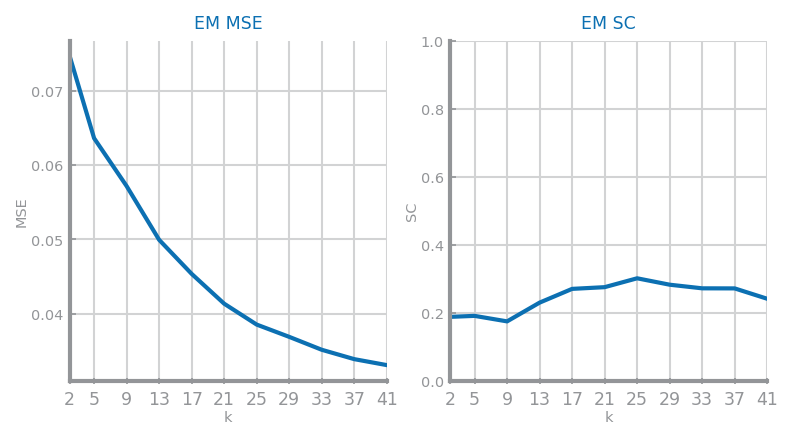

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE', ax=ax[0, 0])
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 1], percentage=True)
plt.show()

In [93]:
k = 25
estimator = GaussianMixture(n_components=k)
estimator.fit(norm_data_minmax)
labels = estimator.predict(norm_data_minmax)
mse.append(ds.compute_mse(norm_data_minmax.values, labels, estimator.means_))
sc.append(silhouette_score(norm_data_minmax, labels))

ix=0
counts = [[0,0] for val in range(k)]
for val in y0:
    counts[labels[ix]][val]+=1
    ix+=1
    
perc = [0 for val in range(k)]
for ix in range(len(counts)):
    perc[ix] = counts[labels[ix]][1]/(counts[labels[ix]][1]+counts[labels[ix]][0])
    print("["+str(ix) + "]: " + str(counts[labels[ix]][1]/(counts[labels[ix]][1]+counts[labels[ix]][0])))
    
total = 0
mean = sum(perc)/len(perc)
for ix in range(len(perc)):
    if perc[ix]-mean > 0:
        total += perc[ix]-mean
    else:
        total -= perc[ix]-mean

print(total/k)
    

[0]: 0.25
[1]: 0.5714285714285714
[2]: 0.5384615384615384
[3]: 0.5
[4]: 0.5384615384615384
[5]: 0.75
[6]: 0.375
[7]: 0.5384615384615384
[8]: 0.16666666666666666
[9]: 0.3333333333333333
[10]: 0.5384615384615384
[11]: 0.2857142857142857
[12]: 0.3333333333333333
[13]: 0.3333333333333333
[14]: 0.5
[15]: 0.5
[16]: 0.0
[17]: 0.15384615384615385
[18]: 0.4444444444444444
[19]: 0.3333333333333333
[20]: 0.4
[21]: 0.4444444444444444
[22]: 0.2857142857142857
[23]: 0.5
[24]: 0.25
0.13077245421245423
